In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df=pd.read_csv("/content/Amazon Customer Behavior Survey.csv")
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [ ]:
#cleaning data
df.dropna(inplace=True)

In [ ]:
#check dtypes
df.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

###1.1 add the new column- age group

In [ ]:
bins= [0,15,25,35,45,55,100]
labels = ['0-15','15-25','25-35','35-45','45-55', 'over 55']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

0-15         2
15-25      236
25-35      189
35-45       84
45-55       69
over 55     20
Name: age_group, dtype: int64


###1.2 check purchase frequency depends on gender

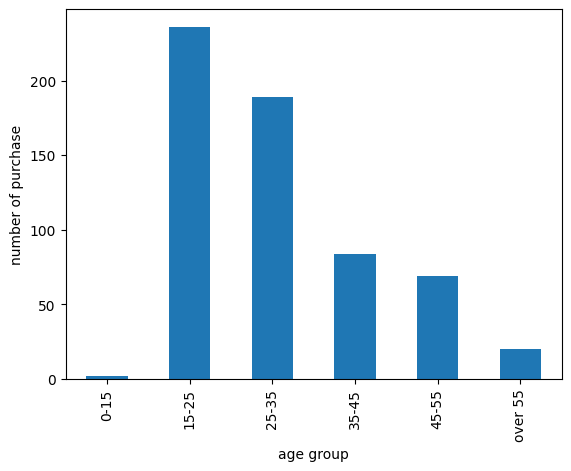

In [ ]:
age_client_num = pd.DataFrame({
    'age_group': ['0-15','15-25','25-35','35-45','45-55', 'over 55'],
    'age_group_counts': [2,236,189,84,69,20]
})

ax = age_client_num.plot(kind='bar', x='age_group', y='age_group_counts', legend=False)
plt.ylabel('number of purchase')
plt.xlabel('age group')
plt.show()

Text(0.5, 1.0, 'Number of Purchase by age group')

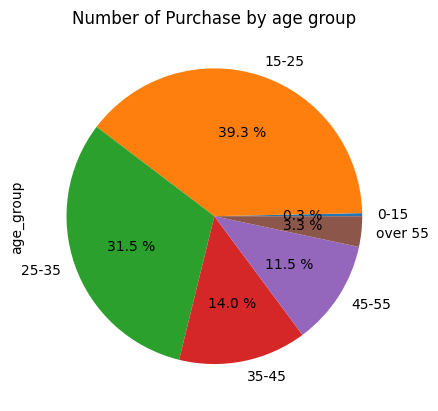

In [ ]:
#show result in pie chart

age_group_counts.plot(kind="pie", autopct="%1.1f %%")
plt.title("Number of Purchase by age group")


### 2.1 check the relationship between gender and purchase frequency

In [ ]:
gender_purchase_frequency=pd.DataFrame(df.groupby('Gender').count()['Purchase_Frequency'])
gender_purchase_frequency

,Purchase_Frequency
Gender,
Female,350
Male,142
Others,19
Prefer not to say,89


###2.2 make bar chart for gender and purchase frequency

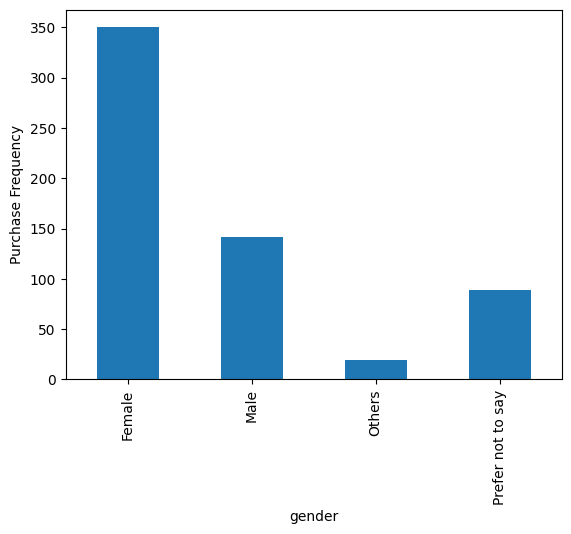

In [ ]:
purchase_frequency_gender = pd.DataFrame({
    'Gender': ['Female','Male','Others','Prefer not to say'],
    'Purchase_Frequency': [350,142,19,89]
})

ax = purchase_frequency_gender.plot(kind='bar', x='Gender', y='Purchase_Frequency', legend=False)
plt.ylabel('Purchase Frequency')
plt.xlabel('gender')
plt.show()

###3.1 check review Reliability

In [ ]:
review_group_counts = df['Review_Reliability'].value_counts().sort_index()
print(review_group_counts)

Heavily         149
Moderately      197
Never            23
Occasionally    190
Rarely           41
Name: Review_Reliability, dtype: int64


###3.2 bar chart about review Reliability and number of purchase

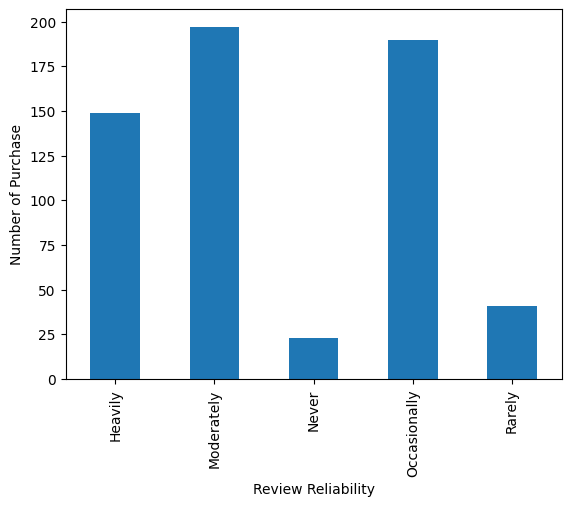

In [ ]:
review_reliability_purchase = pd.DataFrame({
    'Review_Reliability': ['Heavily','Moderately','Never','Occasionally','Rarely'],
    'review_group_counts': [149,197,23,190,41]
})

ax = review_reliability_purchase .plot(kind='bar', x='Review_Reliability', y='review_group_counts', legend=False)
plt.ylabel('Number of Purchase')
plt.xlabel('Review Reliability')
plt.show()

Text(0.5, 1.0, 'Review Reliability')

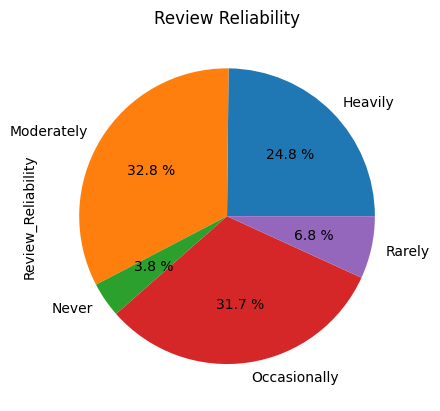

In [ ]:
#show result in pie chart

review_group_counts.plot(kind="pie", autopct="%1.1f %%")
plt.title("Review Reliability")

### 4.1 check shopping satisfaction

In [ ]:
shopping_satisfactio_counts = df['Shopping_Satisfaction'].value_counts().sort_index()
print(shopping_satisfactio_counts)

1    115
2    193
3    208
4     67
5     17
Name: Shopping_Satisfaction, dtype: int64


###4.2 bar chart about review shopping satisfaction and number of purchase

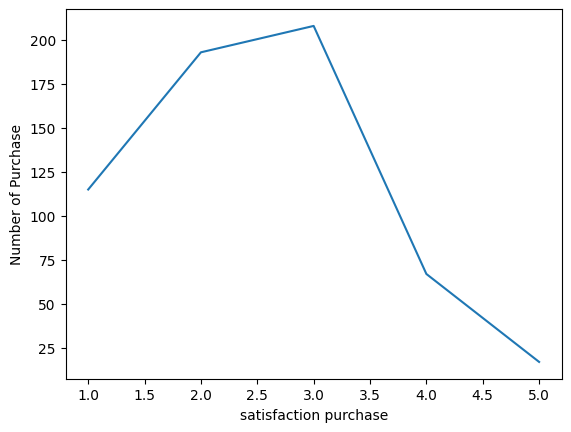

In [ ]:
shopping_satisfaction_purchase = pd.DataFrame({
    'Review_Reliability': [1,2,3,4,5],
    'review_group_counts': [115,193,208,67,17]
})

ax = shopping_satisfaction_purchase .plot(kind='line', x='Review_Reliability', y='review_group_counts', legend=False)

plt.ylabel('Number of Purchase')
plt.xlabel('satisfaction purchase')
plt.show()

In [ ]:
#calculate average
df['Shopping_Satisfaction'].mean()

2.4633333333333334

###5.1 check top 4 Improvement Areas

In [ ]:
#make tables of most common Improvement Areas
Improvement_Areas_counts = df['Improvement_Areas'].value_counts().sort_index().sort_values()

Improvement_Areas_counts.tail(4)


Shipping speed and reliability      78
Reducing packaging waste           133
Product quality and accuracy       159
Customer service responsiveness    216
Name: Improvement_Areas, dtype: int64

###5.2 bar chart about review Improvement Areas and number of purchase

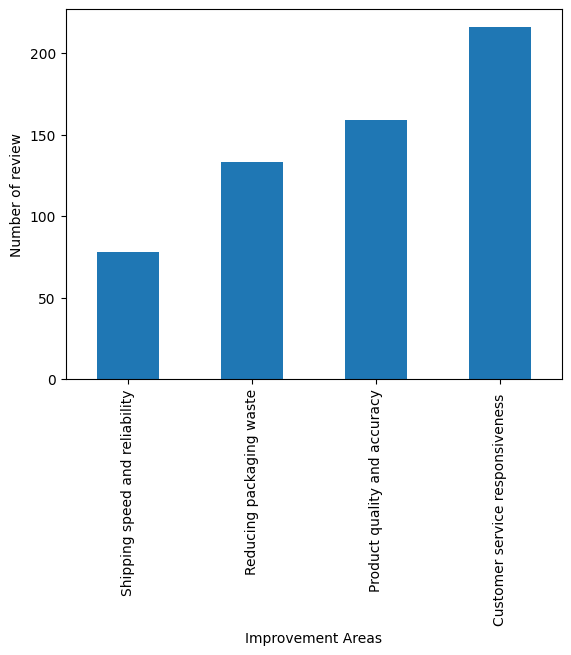

In [ ]:
Improvement_Areas_purchase = pd.DataFrame({
    'Improvement_Areas': ['Shipping speed and reliability','Reducing packaging waste','Product quality and accuracy','Customer service responsiveness '],
    'review_numbers': [78,133,159,216]
})

ax = Improvement_Areas_purchase .plot(kind='bar', x='Improvement_Areas', y='review_numbers', legend=False)

plt.ylabel('Number of review')
plt.xlabel('Improvement Areas')
plt.show()

Text(0.5, 1.0, 'Top 4 reviews')

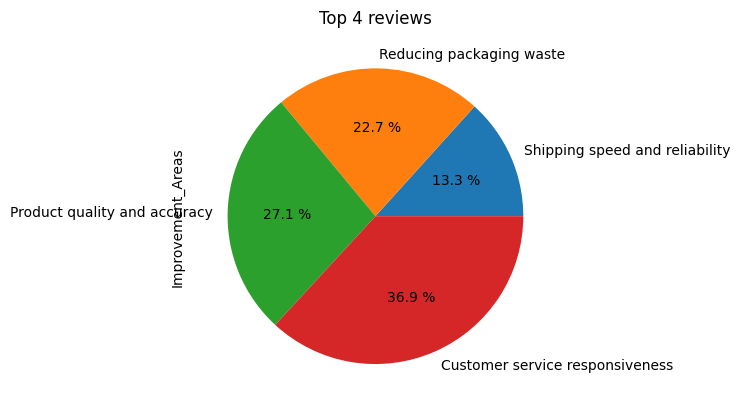

In [ ]:
#show result in pie chart
ax = Improvement_Areas_counts.tail(4)[:4].plot(kind='pie', autopct="%1.1f %%")

plt.title("Top 4 reviews")

###6.1 which hour customers shop most

In [ ]:
df['timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('timestamp', inplace=True)

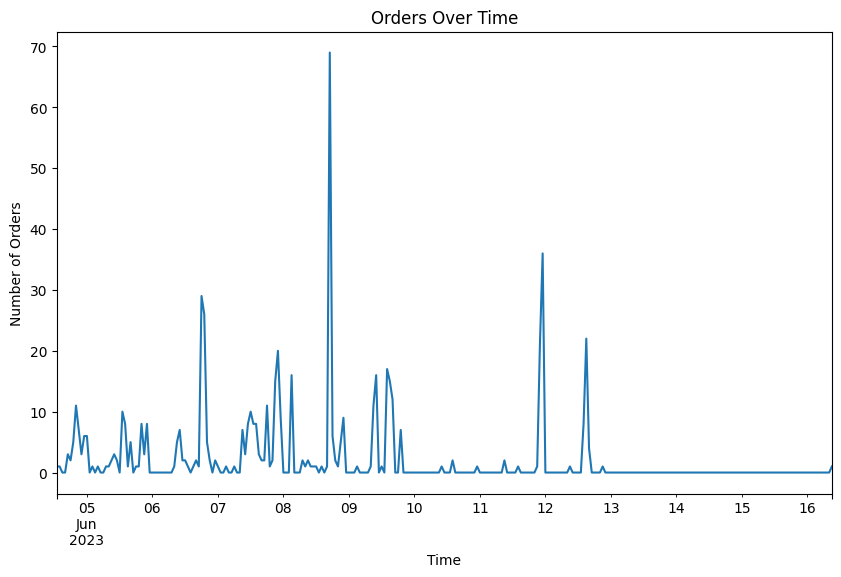

In [ ]:
orders_per_time = df.resample('H').size()
orders_per_time.plot(kind='line', figsize=(10, 6), title='Orders Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.show()